<div style="text-align: center;">
    <br><br>
    <h1>KPIs of Consumer Electronics</h1>
    <hr style="width: 100%;"> <!-- The line is also centered, and you can adjust the width as needed -->
    <br><br>
</div>

<div style="text-align: center;">
    <br>
    <h2>1.2 Imports</h2>
    <hr style="width: 100%;"> <!-- The line is also centered, and you can adjust the width as needed -->
    <br><br>
</div>

In [1]:
# Import Dataset 1 : csv file

import pandas as pd

file_path_1 = 'consumer_electronics_sales_data.csv'

# Load the Excel file into a pandas DataFrame
ds_1 = pd.read_csv(file_path_1)

# Display the first few rows of the DataFrame to verify the import
print('---------------------*HEAD*---------------------')
print(ds_1.head())
print('-------------------*END HEAD*-------------------')

---------------------*HEAD*---------------------
   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7                     2               1  
2               0                  1                     5               1  
3               1                 10                     3               1  
4               0                 17                     3               0  
-------------------*END HEAD*-------------------


In [2]:
# Import Dataset 2 : csv file

import pandas as pd

file_path_2 = 'customer_acquisition_data.csv'

# Load the Excel file into a pandas DataFrame
ds_2 = pd.read_csv(file_path_2)

# Display the first few rows of the DataFrame to verify the import
print('---------------------*HEAD*---------------------')
print(ds_2.head())
print('-------------------*END HEAD*-------------------')

---------------------*HEAD*---------------------
   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419
-------------------*END HEAD*-------------------


<div style="text-align: center;">
    <br>
    <h2>1.3 Data Wrangling</h2>
    <hr style="width: 100%;"> <!-- The line is also centered, and you can adjust the width as needed -->
    <br><br>
</div>

In [3]:
import pandas as pd


# Display basic info
print("ds_1 info:")
print(ds_1.info())
print("\nds_2 info:")
print(ds_2.info())

# Missing values
# Drop columns with a high percentage of missing values, or fill with a placeholder
threshold = 0.5  # Drop columns with more than 50% missing values
ds_1 = ds_1.dropna(thresh=len(ds_1) * (1 - threshold), axis=1)
ds_2 = ds_2.dropna(thresh=len(ds_2) * (1 - threshold), axis=1)

# Fillling remaining missing values
ds_1.fillna(ds_1.median(numeric_only=True), inplace=True)
ds_2.fillna(ds_2.median(numeric_only=True), inplace=True)


# Duplicates
ds_1.drop_duplicates(inplace=True)
ds_2.drop_duplicates(inplace=True)

ds_1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB
None

ds_2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  

In [4]:
#Semantic Cleaning for ds_1

In [5]:
# Columns to check 
columns_to_check = ["ProductPrice"]

# Negative or zero values in each column
for col in columns_to_check:
    if col in ds_1.columns:
        negative_or_zero = ds_1[ds_1[col] <= 0]
        if not negative_or_zero.empty:
            print(f"Column '{col}' has {len(negative_or_zero)} rows with negative or zero values:")
            print(negative_or_zero[[col]])
        else:
            print(f"Column '{col}' has no negative or zero values.")
    else:
        print(f"Column '{col}' does not exist in ds_2.")

Column 'ProductPrice' has no negative or zero values.


In [6]:
#Semantic cleaning for ds_2

In [7]:
# Columns to check 
columns_to_check = ["cost", "conversion_rate", "revenue"]

# Negative or zero values in each column
for col in columns_to_check:
    if col in ds_2.columns:
        negative_or_zero = ds_2[ds_2[col] <= 0]
        if not negative_or_zero.empty:
            print(f"Column '{col}' has {len(negative_or_zero)} rows with negative or zero values:")
            print(negative_or_zero[[col]])
        else:
            print(f"Column '{col}' has no negative or zero values.")
    else:
        print(f"Column '{col}' does not exist in ds_2.")

Column 'cost' has no negative or zero values.
Column 'conversion_rate' has no negative or zero values.
Column 'revenue' has no negative or zero values.


In [8]:
#checking ds_1 null vlaues

In [9]:
# Separating categorical and non-categorical columns
categorical_columns = ds_1.select_dtypes(include=['object', 'category']).columns
noncategorical_columns = ds_1.select_dtypes(exclude=['object', 'category']).columns

# Null values in categorical columns
null_categorical = ds_1[categorical_columns].isnull().sum()
null_categorical = null_categorical[null_categorical > 0]  # Filter columns with nulls
if not null_categorical.empty:
    print("Categorical columns with null values:")
    print(null_categorical)
else:
    print("No null values in categorical columns.")

# Null values in non-categorical columns
null_noncategorical = ds_1[noncategorical_columns].isnull().sum()
null_noncategorical = null_noncategorical[null_noncategorical > 0]  # Filter columns with nulls
if not null_noncategorical.empty:
    print("\nNon-categorical columns with null values:")
    print(null_noncategorical)
else:
    print("No null values in non-categorical columns.")


No null values in categorical columns.
No null values in non-categorical columns.


In [10]:
#ds_2 null values

In [11]:
# Separating categorical and non-categorical columns
categorical_columns = ds_2.select_dtypes(include=['object', 'category']).columns
noncategorical_columns = ds_2.select_dtypes(exclude=['object', 'category']).columns

# Check for null values in categorical columns
null_categorical = ds_2[categorical_columns].isnull().sum()
null_categorical = null_categorical[null_categorical > 0]  # Filter columns with nulls
if not null_categorical.empty:
    print("Categorical columns with null values:")
    print(null_categorical)
else:
    print("No null values in categorical columns.")

# Check for null values in non-categorical columns
null_noncategorical = ds_2[noncategorical_columns].isnull().sum()
null_noncategorical = null_noncategorical[null_noncategorical > 0]  # Filter columns with nulls
if not null_noncategorical.empty:
    print("\nNon-categorical columns with null values:")
    print(null_noncategorical)
else:
    print("No null values in non-categorical columns.")


No null values in categorical columns.
No null values in non-categorical columns.


<div style="text-align: center;">
    <br>
    <h2>1.4 Pre Processing</h2>
    <hr style="width: 100%;"> <!-- The line is also centered, and you can adjust the width as needed -->
    <br><br>
</div>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# --- Dataset 1 Preprocessing ---
# One-hot encoding categorical features
encoder_1 = OneHotEncoder(drop='first', sparse_output=False)
categorical_features_ds1 = ['ProductCategory', 'ProductBrand']
encoded_ds1 = encoder_1.fit_transform(ds_1[categorical_features_ds1])
encoded_ds1_df = pd.DataFrame(encoded_ds1, columns=encoder_1.get_feature_names_out(categorical_features_ds1))

# Dropping original categorical columns and concatenate encoded ones
ds_1 = pd.concat([ds_1.drop(columns=categorical_features_ds1), encoded_ds1_df], axis=1)

# Standardizing numeric features
scaler_1 = StandardScaler()
numeric_features_ds1 = ['ProductPrice', 'CustomerAge', 'PurchaseFrequency']
ds_1[numeric_features_ds1] = scaler_1.fit_transform(ds_1[numeric_features_ds1])

# --- Dataset 1: Calculating LCV ---
# Calculating a simplified LCV based on available features
ds_1['LifetimeCustomerValue'] = ds_1['ProductPrice'] * ds_1['PurchaseFrequency']

# Check the first few rows to verify the LCV calculation
print(ds_1[['ProductPrice', 'PurchaseFrequency', 'CustomerAge', 'LifetimeCustomerValue']].head())

# --- Prepare features and target ---
X_ds1 = ds_1.drop(columns=['LifetimeCustomerValue'])  # Features
y_ds1 = ds_1['LifetimeCustomerValue']  # Target (LCV)

# Standardizing and splitting
X_train_ds1, X_test_ds1, y_train_ds1, y_test_ds1 = train_test_split(X_ds1, y_ds1, test_size=0.2, random_state=42)



# --- Dataset 2 Preprocessing ---
# One-hot encoding categorical features
encoder_2 = OneHotEncoder(drop='first', sparse_output=False)
categorical_features_ds2 = ['channel']
encoded_ds2 = encoder_2.fit_transform(ds_2[categorical_features_ds2])
encoded_ds2_df = pd.DataFrame(encoded_ds2, columns=encoder_2.get_feature_names_out(categorical_features_ds2))

# Dropping original categorical columns and concatenate encoded ones
ds_2 = pd.concat([ds_2.drop(columns=categorical_features_ds2), encoded_ds2_df], axis=1)


# Standardizing numeric features
scaler_2 = StandardScaler()
numeric_features_ds2 = ['cost', 'conversion_rate']
ds_2[numeric_features_ds2] = scaler_2.fit_transform(ds_2[numeric_features_ds2])


# revenue and conversion rate target vars
y_revenue = ds_2['revenue']  
y_conversion = ds_2['conversion_rate']  
X = ds_2.drop(columns=['revenue', 'conversion_rate'])  

# Train-test split
X_train_ds2, X_test_ds2, y_train_revenue_ds2, y_test_revenue_ds2 = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
_, _, y_train_conversion, y_test_conversion = train_test_split(X, y_conversion, test_size=0.2, random_state=42)


# shapes of results
print("Dataset 1 Training Features Shape:", X_train_ds1.shape)
print("Dataset 1 Testing Features Shape:", X_test_ds1.shape)
print("Dataset 2 Training Features Shape:", X_train_ds2.shape)
print("Dataset 2 Testing Features Shape:", X_test_ds2.shape)

   ProductPrice  PurchaseFrequency  CustomerAge  LifetimeCustomerValue
0     -1.463484          -1.474937    -1.683711               2.158547
1     -0.659199          -0.559358    -0.554461               0.368728
2      1.300576          -1.658053     1.305479              -2.156423
3     -0.791745          -0.010010     1.305479               0.007926
4      0.327198           1.271800     0.906920               0.416130
Dataset 1 Training Features Shape: (7200, 15)
Dataset 1 Testing Features Shape: (1800, 15)
Dataset 2 Training Features Shape: (640, 5)
Dataset 2 Testing Features Shape: (160, 5)


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# --- Linear Regression (Default) ---
lr = LinearRegression()
lr.fit(X_train_ds1, y_train_ds1)
y_pred_lr = lr.predict(X_test_ds1)
print("Default Linear Regression:")
print(f"MSE: {mean_squared_error(y_test_ds1, y_pred_lr):.4f}")
print(f"R²: {r2_score(y_test_ds1, y_pred_lr):.4f}")

# --- Random Forest Regressor with Hyperparameter Tuning ---
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_rf.fit(X_train_ds1, y_train_ds1)

# Best model and evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_ds1)
print("\nRandom Forest Regressor (Tuned):")
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"MSE: {mean_squared_error(y_test_ds1, y_pred_rf):.4f}")
print(f"R²: {r2_score(y_test_ds1, y_pred_rf):.4f}")

Default Linear Regression:
MSE: 1.0413
R²: -0.0003
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

It appears the hyper parameter tuned Random Forest Regressor yeilded as the best model to predict lifetime customer value.

In [15]:
import numpy as np

# Use the best Random Forest model to make predictions
predicted_lcv = best_rf.predict(X_test_ds1)

# Combine actual and predicted values in a DataFrame
results_df = pd.DataFrame({
    'Actual LCV': y_test_ds1.values,
    'Predicted LCV': predicted_lcv
})

# Display the first few rows of results
print(results_df.head())

# percentage difference (error) is somewhat useful
results_df['Percentage Error (%)'] = np.abs((results_df['Actual LCV'] - results_df['Predicted LCV']) / results_df['Actual LCV']) * 100
print("\nResults with Percentage Error:")
print(results_df.head())

   Actual LCV  Predicted LCV
0    0.056533       0.067445
1    0.539553       0.541411
2    0.138791       0.136456
3   -0.343394      -0.344397
4   -1.212612      -1.215340

Results with Percentage Error:
   Actual LCV  Predicted LCV  Percentage Error (%)
0    0.056533       0.067445             19.302932
1    0.539553       0.541411              0.344368
2    0.138791       0.136456              1.682075
3   -0.343394      -0.344397              0.292202
4   -1.212612      -1.215340              0.224954


ds_2 Machine Learning

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
# Calculate Customer Acquisition Cost (CAC) KPI
ds_2['cac'] = ds_2['cost'] / (ds_2['revenue'] / ds_2['cost'])  # Modify this formula based on your dataset understanding

# Targeting Customer Acquisition Cost (CAC) 
y = ds_2['cac']  # Target: Customer Acquisition Cost 
X = ds_2.drop(columns=['revenue', 'conversion_rate', 'cac'])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature preprocessing pipeline (scaling numerical features, encoding categorical)
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Modeling Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Evaluating model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance (CAC Prediction):")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Cross-validation for robust performance measure
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.4f}")

#Hyperparameter tuning 
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


# Using the best model from grid search for predictions
best_model = grid_search.best_estimator_

Model Performance (CAC Prediction):
MSE: 0.0403
R²: 0.4682
Cross-Validation MSE: 0.0307
Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}


This is a fairly decent model with decent parameters, that we can move forward with.

Final Model Performance (CAC Prediction) after Hyperparameter Tuning:
MSE: 0.0131
R²: 0.6285


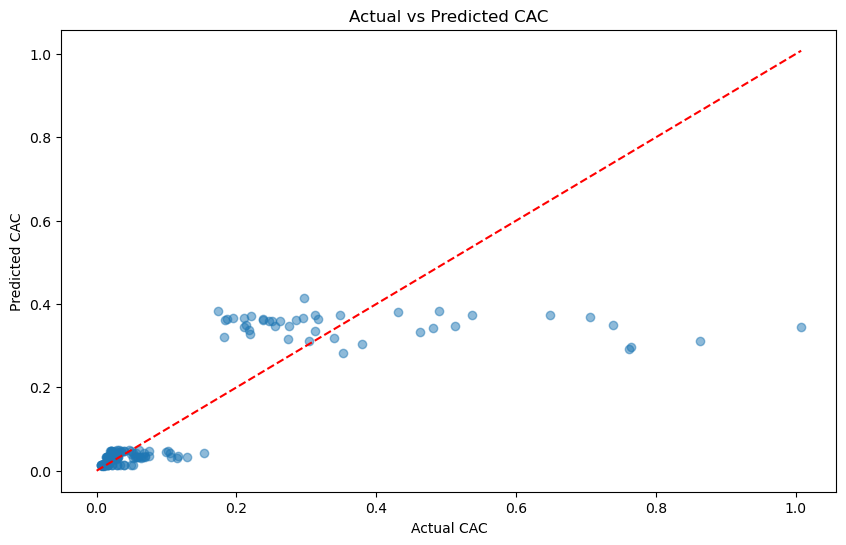

In [41]:
# predictions using the best model
y_pred_cac = best_model.predict(X_test)

# Evaluating predictions
mse_best = mean_squared_error(y_test, y_pred_cac)
r2_best = r2_score(y_test, y_pred_cac)

print(f"Final Model Performance (CAC Prediction) after Hyperparameter Tuning:")
print(f"MSE: {mse_best:.4f}")
print(f"R²: {r2_best:.4f}")

# Visualization of Actual vs Predicted CAC
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cac, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual CAC')
plt.ylabel('Predicted CAC')
plt.title('Actual vs Predicted CAC')
plt.show()

Lets try making an improvement

In [30]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Data Preprocessing
# Calculate Customer Acquisition Cost (CAC)
ds_2['cac'] = ds_2['cost'] / (ds_2['revenue'] / ds_2['cost'])  # Modify formula based on understanding

# log transformation to the target variable for skewness
y = np.log1p(ds_2['cac'])  # Apply log(1 + cac) transformation
X = ds_2.drop(columns=['revenue', 'conversion_rate', 'cac'])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature preprocessing pipeline (scaling numerical features, encoding categorical)
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Polynomial feature engineering (to capture non-linear relationships)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Stacking a Model with Random Forest, XGBoost, and GradientBoosting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Stacking Regressor combining Random Forest, XGBoost, and GradientBoosting
stacked_model = StackingRegressor(estimators=[('rf', rf_model), ('xgb', xgb_model), ('gb', gb_model)],
                                  final_estimator=LinearRegression())

# The Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly),  # Apply polynomial features
    ('model', stacked_model)
])

# Hyperparameter Tuning using RandomizedSearchCV for the stacked model
param_grid = {
    'model__rf__n_estimators': [100, 200],
    'model__xgb__n_estimators': [100, 200],
    'model__gb__n_estimators': [100, 200],
    'model__xgb__learning_rate': [0.01, 0.05, 0.1],
    'model__rf__max_depth': [3, 5],
    'model__gb__max_depth': [3, 5]
}

# RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Evaluating the model
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance
print(f"Model Performance (CAC Prediction) after Hyperparameter Tuning:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Cross-validation folds for robust performance measure
cv_scores = cross_val_score(random_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.4f}")

# Display the best parameters found by RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Useing the best model to predict future CAC
best_model = random_search.best_estimator_
future_predictions = best_model.predict(X_test)

# Printing future predictions
print(f"Future CAC Predictions: {future_predictions[:10]}")  # Display the first 10 predictions

Model Performance (CAC Prediction) after Hyperparameter Tuning:
MSE: 0.0131
R²: 0.6285
Cross-Validation MSE: 0.0102
Best Parameters from RandomizedSearchCV: {'model__xgb__n_estimators': 200, 'model__xgb__learning_rate': 0.01, 'model__rf__n_estimators': 200, 'model__rf__max_depth': 3, 'model__gb__n_estimators': 200, 'model__gb__max_depth': 5}
Future CAC Predictions: [0.03327204 0.03612162 0.03968601 0.03352152 0.37291643 0.04608147
 0.0131756  0.01323046 0.04725433 0.03287917]


It appears the this new machine learning algorithm preforms better than the previous one. Lets go ahead and make predicitons

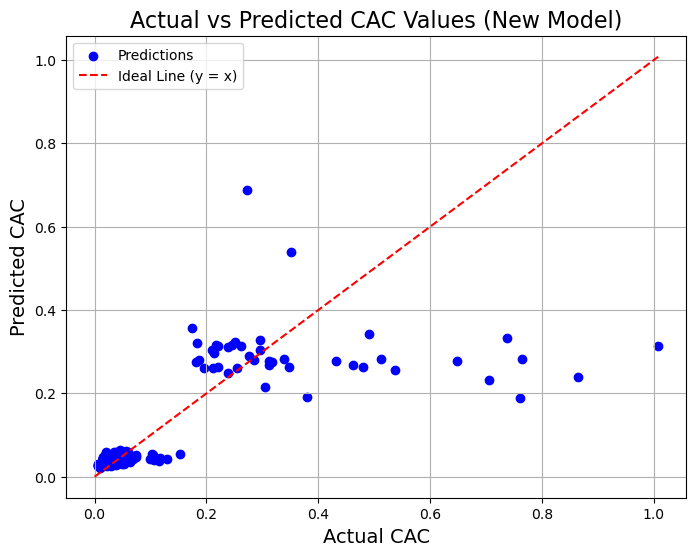

Future CAC Predictions: [0.04498777 0.04837826 0.05015385 0.03513415 0.26901329 0.05168162
 0.02498792 0.0296545  0.05249041 0.04606411]


In [40]:
import matplotlib.pyplot as plt
import numpy as np


# Making predictions using the best model (new model with hyperparameter tuning)
y_pred_new = pipeline.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_new, color='blue', label='Predictions')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Ideal Line (y = x)')

# Plot
plt.title("Actual vs Predicted CAC Values (New Model)", fontsize=16)
plt.xlabel("Actual CAC", fontsize=14)
plt.ylabel("Predicted CAC", fontsize=14)
plt.legend()
plt.grid(True)


plt.show()

# Output some predictions
print("Future CAC Predictions:", y_pred_new[:10])  # Showing first 10 predictions as an example

